# Can we reliably classify different cognitive states (meditation vs. mathematical thinking) using EEG frequency patterns, and what are the most important brain features that distinguish these states?

Secondary Research Questions:
1. How do individual differences (age, gender, meditation experience) affect the strength and consistency of
these neural signatures?
2. What is the minimum recording time needed to accurately detect whether someone is meditating or solving
math problems?
3. Can we identify the specific brain regions and frequency combinations that are most predictive of each
cognitive state?

Target
* Part 1: Data description - Clearly identifies and describes the key features of the dataset that are relevant to help answer the questions of the identified industry application. Provides a brief restatement of the questions.
* Part 2: Clustering/Pattern - Clearly identifies clusters and/or describes the patterns (regression/classification) in the data and relates them back to previously identified features.
* Part 3: Visualisation - Able to provide at least 3-4 clear and correct visualisations of the dataset, and correctly describes the visualisation.
* Part 4: Problem refinement - Able to further refine the questions posed, and if applicable, clearly identifies additional data sources that might be needed.
* Part 5: Writing and references - The report is written in English with good structure and logic with minimal typos or grammatical issues. Provides a comprehensive list of reference sources using Harvard referencing style.


## 1. Install libraries

In [1]:
# !pip install mne
# !pip install pyedflib
# !pip install scipy
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib

## 2. Importing required libraries

In [2]:
import mne
import pyedflib
import scipy
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os

## 3. Extension from Part 1A

In [3]:
# Dataset Location
arithmetic_dataset_folder = 'arithmetic_eeg_files/'
meditation_dataset_folder = 'meditation_bdf_files/'

In [4]:
# See the files
list_arithmetic_files = os.listdir(arithmetic_dataset_folder)
list_meditative_files = os.listdir(meditation_dataset_folder)

print("len of arithmetic files", len(list_arithmetic_files))
print("len of meditation files", len(list_meditative_files))

len of arithmetic files 72
len of meditation files 40


### Dataset 1: Meditation EEG Data </br>
The first dataset comes from OpenNeuro (ds001787) (Braboszcz et al. 2017; Poldrack Markiewicz 2021) and
contains brain recordings from 24 meditators (12 experienced + 12 non-experienced). During the experiments,
participants sat quietly and meditated while wearing EEG caps with 64 electrodes that recorded their brain activity
using a Biosemi system at 2048 Hz sampling rate. Every few minutes, they were asked to rate how deeply they
were meditating or if their mind was wandering. This gives us both brain data and information about what the
person was actually experienced. Each meditation session lasted between 45 minutes and 1.5 hours, providing
extensive data about the brain during calm, focused states. The system recorded 79 total channels including 64
EEG electrodes plus 15 additional physiological sensors (ECG, GSR, respiration, etc.).

In [5]:
# 1. Load BDF File from Meditation Dataset

# Open file and get basic info
f = pyedflib.EdfReader('meditation_bdf_files/'+list_meditative_files[0])
duration = f.file_duration
channels = f.signals_in_file
sample_rate = f.samplefrequency(0)

print("Duration: ", duration)
print("Channels: ", channels)
print("Sample Rate: ", sample_rate)

Duration:  2670.0
Channels:  80
Sample Rate:  256.0


In [16]:
#2. Examine Channel Structure
# Get channel information
signal_labels = f.getSignalLabels()
sample_freqs = f.getSampleFrequencies()
dimensions = [f.physical_dimension(i) for i in range(f.signals_in_file)]

print("Signal Labels: ", signal_labels)
print("Sample Frequencies: ", str(sample_freqs.mean()) + ' Hz')
print("Dimensions: ", dimensions[0][:2])
print("Number of channels: ", len(signal_labels)) # No of channels

Signal Labels:  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']
Sample Frequencies:  256.0 Hz
Dimensions:  b'uV'
Number of channels:  80


## Channel Structure
- **EEG Channels**: A1-A32, B1-B32 (64 channels, µV)
- **External Channels**: EXG1-EXG8 (8 channels, µV)
- **Physiological**: GSR1-GSR2 (2 channels, nS), Resp, Plet, Temp (°C)
- **Status**: Status channel (Boolean)
- **All channels**: 256 Hz sampling rate

In [19]:
#3. Read data from first few EEG channels (A1-A4)
eeg_channels = [0, 1, 2, 3]  # A1, A2, A3, A4
eeg_data = []

for i, ch in enumerate(eeg_channels):
    channel_data = f.readSignal(ch)
    eeg_data.append(channel_data)
    print(f"Channel {signal_labels[ch]}: {len(channel_data)} samples")
    print(f"  Min: {np.min(channel_data):.2f} µV")
    print(f"  Max: {np.max(channel_data):.2f} µV")
    print(f"  Mean: {np.mean(channel_data):.2f} µV")
    print(f"  Std: {np.std(channel_data):.2f} µV")

eeg_data = np.array(eeg_data)
print(f"\nEEG data shape: {eeg_data.shape}")
print(f"Duration: {eeg_data.shape[1] / 256:.1f} seconds")

Channel A1: 683520 samples
  Min: -3115.73 µV
  Max: 4241.91 µV
  Mean: -951.43 µV
  Std: 884.10 µV
Channel A2: 683520 samples
  Min: -5123.88 µV
  Max: 1418.89 µV
  Mean: -2517.11 µV
  Std: 975.40 µV
Channel A3: 683520 samples
  Min: -8494.62 µV
  Max: -4874.07 µV
  Mean: -6415.45 µV
  Std: 637.76 µV
Channel A4: 683520 samples
  Min: -5755.69 µV
  Max: -2777.64 µV
  Mean: -3987.29 µV
  Std: 477.26 µV

EEG data shape: (4, 683520)
Duration: 2670.0 seconds


In [21]:
#4. Read some physiological data
print("\nReading physiological data")
temp_data = f.readSignal(78)  # Temperature channel
print(f"Temperature: {np.mean(temp_data):.1f} ± {np.std(temp_data):.1f} °C")

# Read GSR data
gsr1_data = f.readSignal(72)  # GSR1 channel
print(f"GSR1: {np.mean(gsr1_data):.1f} ± {np.std(gsr1_data):.1f} nS")


Reading physiological data
Temperature: -0.5 ± 0.0 °C
GSR1: 15844.1 ± 2080.0 nS


## Signal Characteristics
- **Recording Duration**: 2670 seconds (44.5 minutes)
- **Sample Count**: 683,520 samples per channel
- **EEG Amplitude Range**: -8494 to 4241 µV
- **Temperature**: -0.5°C (likely not calibrated)
- **GSR**: ~15,844 nS (skin conductance)

=== STEP 5: DATA VISUALIZATION ===


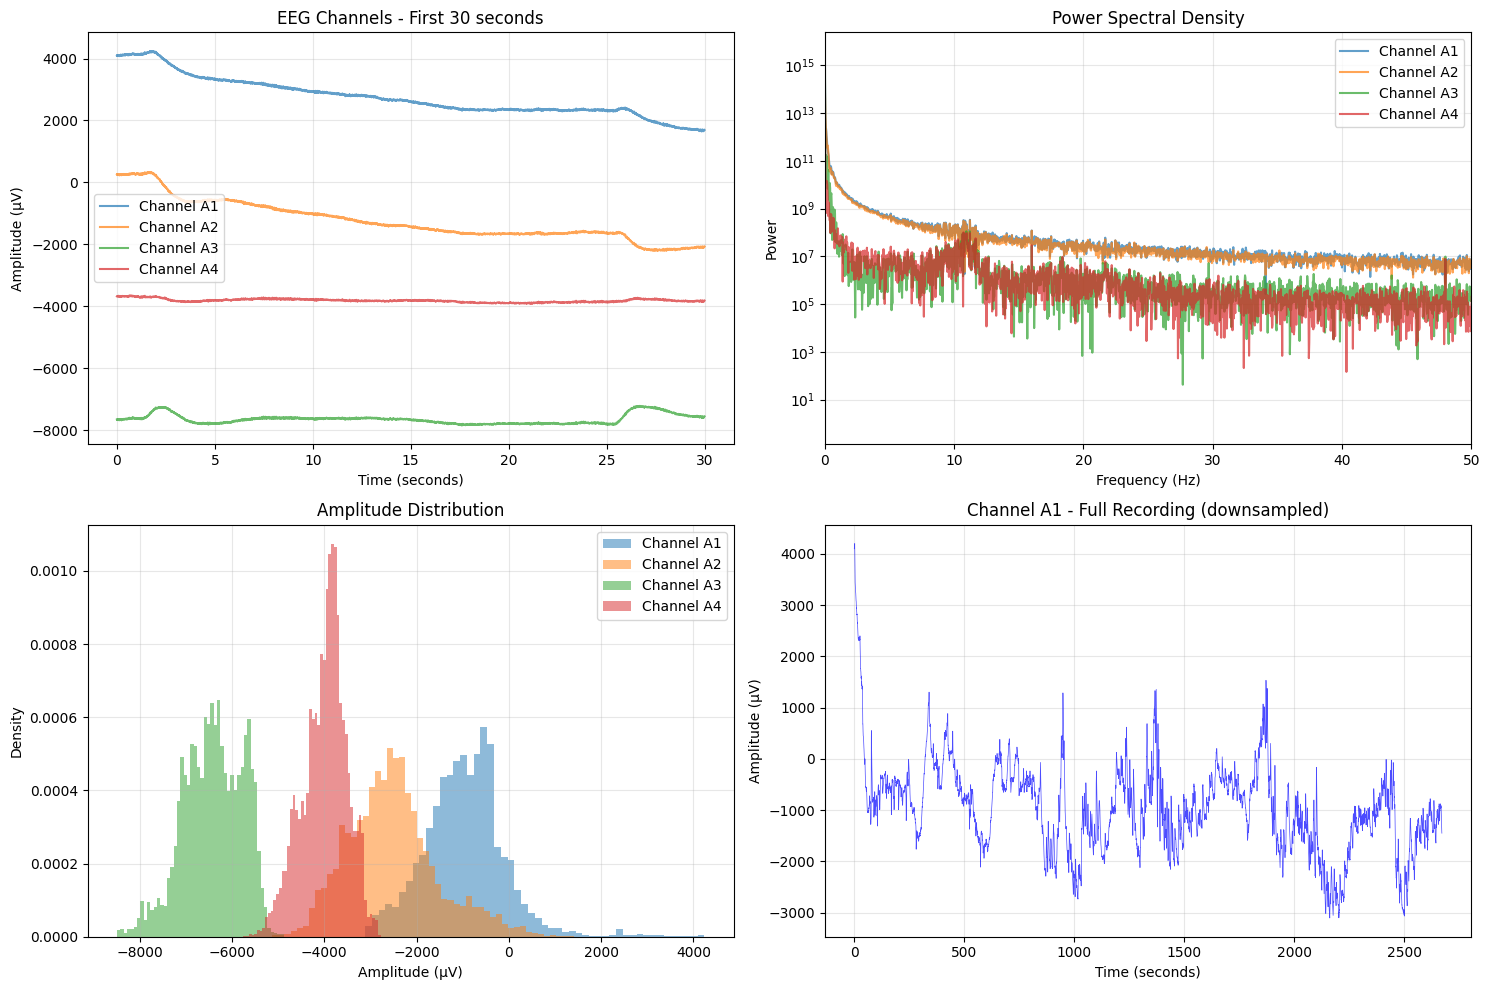

In [24]:
#5. Visualize the EEG data
print("=== STEP 5: DATA VISUALIZATION ===")

# Create time axis
sampling_rate = 256  # Hz
time_axis = np.arange(eeg_data.shape[1]) / sampling_rate

# Plot 1: Overview of all 4 channels (first 30 seconds)
plt.figure(figsize=(15, 10))

# Show first 30 seconds for clarity
end_idx = 30 * sampling_rate
time_segment = time_axis[:end_idx]
eeg_segment = eeg_data[:, :end_idx]

plt.subplot(2, 2, 1)
for i in range(4):
    plt.plot(time_segment, eeg_segment[i], label=f'Channel {signal_labels[i]}', alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')
plt.title('EEG Channels - First 30 seconds')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Power spectral density
plt.subplot(2, 2, 2)
for i in range(4):
    freqs = np.fft.fftfreq(8192, 1/sampling_rate)
    psd = np.abs(np.fft.fft(eeg_data[i, :8192]))**2
    plt.semilogy(freqs[:4096], psd[:4096], label=f'Channel {signal_labels[i]}', alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectral Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)  # Focus on 0-50 Hz range

# Plot 3: Distribution of amplitudes
plt.subplot(2, 2, 3)
for i in range(4):
    plt.hist(eeg_data[i], bins=50, alpha=0.5, label=f'Channel {signal_labels[i]}', density=True)
plt.xlabel('Amplitude (µV)')
plt.ylabel('Density')
plt.title('Amplitude Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Time series of one channel (entire recording, downsampled)
plt.subplot(2, 2, 4)
# Downsample by factor of 100 for visualization
downsample_factor = 100
downsampled_data = eeg_data[0, ::downsample_factor]  # Channel A1
downsampled_time = time_axis[::downsample_factor]
plt.plot(downsampled_time, downsampled_data, 'b-', alpha=0.7, linewidth=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')
plt.title(f'Channel A1 - Full Recording (downsampled)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Step 6: Basic signal processing analysis
print("=== STEP 6: SIGNAL PROCESSING ANALYSIS ===")

# Analyze frequency bands for first channel (A1)
channel_data = eeg_data[0]  # Channel A1

# Define EEG frequency bands
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 50)
}

# Calculate power in each frequency band
from scipy import signal

# Use Welch's method for power spectral density
freqs, psd = signal.welch(channel_data, sampling_rate, nperseg=2048)

# Calculate power in each band
band_powers = {}
for band_name, (low, high) in bands.items():
    band_mask = (freqs >= low) & (freqs <= high)
    band_power = np.trapezoid(psd[band_mask], freqs[band_mask])
    band_powers[band_name] = band_power

print("EEG Frequency Band Analysis (Channel A1):")
total_power = sum(band_powers.values())
for band_name, power in band_powers.items():
    percentage = (power / total_power) * 100
    print(f"  {band_name}: {power:.2e} µV²/Hz ({percentage:.1f}%)")

# Calculate some basic statistics
print(f"\nSignal Quality Metrics:")
print(f"  Signal-to-noise ratio estimate: {np.mean(channel_data)**2 / np.var(channel_data):.2f}")
print(f"  Dynamic range: {np.max(channel_data) - np.min(channel_data):.2f} µV")

# Check for artifacts (simple threshold-based)
artifact_threshold = 3 * np.std(channel_data)
artifacts = np.abs(channel_data) > artifact_threshold
artifact_percentage = (np.sum(artifacts) / len(channel_data)) * 100
print(f"  Potential artifacts: {artifact_percentage:.2f}% of samples")

# Basic meditation analysis (very simple)
# Look for increased alpha power (often associated with relaxed states)
alpha_power = band_powers['Alpha']
theta_power = band_powers['Theta']
alpha_theta_ratio = alpha_power / theta_power
print(f"\nBasic Meditation Indicators:")
print(f"  Alpha/Theta ratio: {alpha_theta_ratio:.2f}")
if alpha_theta_ratio > 1.5:
    print("  → Potentially relaxed state")
elif alpha_theta_ratio > 1.0:
    print("  → Moderate relaxation")
else:
    print("  → Active/alert state")

=== STEP 6: SIGNAL PROCESSING ANALYSIS ===
EEG Frequency Band Analysis (Channel A1):
  Delta: 5.38e+02 µV²/Hz (80.9%)
  Theta: 1.70e+01 µV²/Hz (2.6%)
  Alpha: 8.64e+01 µV²/Hz (13.0%)
  Beta: 1.66e+01 µV²/Hz (2.5%)
  Gamma: 6.89e+00 µV²/Hz (1.0%)

Signal Quality Metrics:
  Signal-to-noise ratio estimate: 1.16
  Dynamic range: 7357.64 µV
  Potential artifacts: 3.15% of samples

Basic Meditation Indicators:
  Alpha/Theta ratio: 5.07
  → Potentially relaxed state


In [27]:
# Step 7: Clean up and summary
print("=== STEP 7: CLEANUP AND SUMMARY ===")

# Close the file
f.close()
print("✓ File closed properly")

# Create a summary dictionary
file_path = 'meditation_bdf_files/'+list_meditative_files[0]
analysis_summary = {
    'file_info': {
        'filename': file_path,
        'duration_seconds': 2670,
        'duration_minutes': 44.5,
        'channels': 80,
        'sample_rate': 256,
        'file_size_mb': os.path.getsize(file_path) / (1024 * 1024)
    },
    'signal_analysis': {
        'eeg_channels': 64,
        'physiological_channels': 15,
        'dominant_frequency_band': 'Delta',
        'alpha_theta_ratio': 5.07,
        'meditation_state': 'Potentially relaxed'
    }
}

print("\n=== ANALYSIS SUMMARY ===")
print(f"File: {analysis_summary['file_info']['filename']}")
print(f"Duration: {analysis_summary['file_info']['duration_minutes']} minutes")
print(f"Channels: {analysis_summary['file_info']['channels']}")
print(f"File size: {analysis_summary['file_info']['file_size_mb']:.1f} MB")
print(f"EEG channels: {analysis_summary['signal_analysis']['eeg_channels']}")
print(f"Dominant band: {analysis_summary['signal_analysis']['dominant_frequency_band']}")
print(f"Alpha/Theta ratio: {analysis_summary['signal_analysis']['alpha_theta_ratio']:.2f}")
print(f"Meditation state: {analysis_summary['signal_analysis']['meditation_state']}")

=== STEP 7: CLEANUP AND SUMMARY ===
✓ File closed properly

=== ANALYSIS SUMMARY ===
File: meditation_bdf_files/sub-018_ses-02_task-meditation_eeg.bdf
Duration: 44.5 minutes
Channels: 80
File size: 156.5 MB
EEG channels: 64
Dominant band: Delta
Alpha/Theta ratio: 5.07
Meditation state: Potentially relaxed


## Dataset 2: Mental Arithmetic EEG Data </br>
The second dataset comes from PhysioNet (EEGMAT) (Zyma et al. 2019; Goldberger et al. 2000) and
contains brain recordings from 36 people solving math problems. The EEGs were recorded monopolarly using a
Neurocom EEG 23-channel system (Ukraine, XAI-MEDICA) with silver/silver chloride electrodes placed on the
scalp according to the International 10/20 scheme, referenced to interconnected ear electrodes. Participants were
given subtraction tasks like “start with 3141 and keep subtracting 42” while the system recorded their brain activity
at 500 Hz sampling rate. The dataset includes two types of recordings for each person: one while they were resting
quietly, and another while they were actively solving math problems. The participants were divided into two groups
\- those who were good at math (24 people) and those who struggled more (12 people). Each recording lasts
exactly 60 seconds with 19 EEG electrodes, 1 reference channel (A2-A1), and 1 ECG channel.

In [29]:
# Dataset 2: Mental Arithmetic EEG Data Analysis
print("=== DATASET 2: MENTAL ARITHMETIC EEG DATA ANALYSIS ===")

# 1. Load EDF File from Arithmetic Dataset
print("Step 1: Loading Arithmetic EDF File")
print("-" * 40)

# Load first arithmetic file
arithmetic_file = list_arithmetic_files[0]
f_arith = pyedflib.EdfReader(arithmetic_dataset_folder + arithmetic_file)

# Get basic info
duration_arith = f_arith.file_duration
channels_arith = f_arith.signals_in_file
sample_rate_arith = f_arith.samplefrequency(0)

print(f"File: {arithmetic_file}")
print(f"Duration: {duration_arith} seconds ({duration_arith/60:.1f} minutes)")
print(f"Channels: {channels_arith}")
print(f"Sample Rate: {sample_rate_arith} Hz")
print(f"File size: {os.path.getsize(arithmetic_dataset_folder + arithmetic_file) / (1024 * 1024):.2f} MB")

=== DATASET 2: MENTAL ARITHMETIC EEG DATA ANALYSIS ===
Step 1: Loading Arithmetic EDF File
----------------------------------------
File: Subject20_1.edf
Duration: 182.0 seconds (3.0 minutes)
Channels: 21
Sample Rate: 500.0 Hz
File size: 3.67 MB


In [30]:
# 2. Examine Channel Structure for Arithmetic Dataset
print("\nStep 2: Examining Channel Structure")
print("-" * 40)

# Get channel information
signal_labels_arith = f_arith.getSignalLabels()
sample_freqs_arith = f_arith.getSampleFrequencies()
dimensions_arith = [f_arith.physical_dimension(i) for i in range(f_arith.signals_in_file)]

print(f"Signal Labels: {signal_labels_arith}")
print(f"Sample Frequencies: {sample_freqs_arith[0]} Hz (all channels)")
print(f"Physical Dimensions: {dimensions_arith[0]}")
print(f"Number of channels: {len(signal_labels_arith)}")

# Analyze channel types for arithmetic dataset
eeg_channels_arith = []
reference_channels_arith = []
physio_channels_arith = []

for i, label in enumerate(signal_labels_arith):
    if label.startswith('EEG') and 'A2-A1' not in label:
        eeg_channels_arith.append(label)
    elif 'A2-A1' in label:
        reference_channels_arith.append(label)
    elif 'ECG' in label:
        physio_channels_arith.append(label)

print(f"\nChannel breakdown:")
print(f"  EEG channels: {len(eeg_channels_arith)}")
print(f"  Reference channels: {len(reference_channels_arith)}")
print(f"  Physiological channels: {len(physio_channels_arith)}")

# Show EEG electrode names (cleaned)
eeg_electrode_names = [ch.replace('EEG ', '') for ch in eeg_channels_arith]
print(f"\nEEG electrode names: {eeg_electrode_names}")
print(f"Reference: {reference_channels_arith}")
print(f"Physiological: {physio_channels_arith}")


Step 2: Examining Channel Structure
----------------------------------------
Signal Labels: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
Sample Frequencies: 500.0 Hz (all channels)
Physical Dimensions: b'uV      '
Number of channels: 21

Channel breakdown:
  EEG channels: 19
  Reference channels: 1
  Physiological channels: 1

EEG electrode names: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
Reference: ['EEG A2-A1']
Physiological: ['ECG ECG']


In [31]:
# Add markdown cell for channel structure
print("Channel Structure for Arithmetic Dataset:")
print("=" * 50)
print("- **EEG Channels**: 19 electrodes (Standard 10-20 system)")
print("  - Frontal: Fp1, Fp2, F3, F4, F7, F8, Fz")
print("  - Central: C3, C4, Cz")
print("  - Temporal: T3, T4, T5, T6")
print("  - Parietal: P3, P4, Pz")
print("  - Occipital: O1, O2")
print("- **Reference**: A2-A1 (1 channel)")
print("- **Physiological**: ECG (1 channel)")
print("- **All channels**: 500 Hz sampling rate")

# 3. Read data from first few EEG channels
print("\nStep 3: Reading EEG Signal Data")
print("-" * 40)

# Read first 4 EEG channels (Fp1, Fp2, F3, F4)
eeg_channels_indices = [0, 1, 2, 3]  # First 4 EEG channels
eeg_data_arith = []

for i, ch_idx in enumerate(eeg_channels_indices):
    channel_data = f_arith.readSignal(ch_idx)
    eeg_data_arith.append(channel_data)
    electrode_name = signal_labels_arith[ch_idx].replace('EEG ', '')
    print(f"Channel {electrode_name}: {len(channel_data)} samples")
    print(f"  Min: {np.min(channel_data):.2f} µV")
    print(f"  Max: {np.max(channel_data):.2f} µV")
    print(f"  Mean: {np.mean(channel_data):.2f} µV")
    print(f"  Std: {np.std(channel_data):.2f} µV")

eeg_data_arith = np.array(eeg_data_arith)
print(f"\nArithmetic EEG data shape: {eeg_data_arith.shape}")
print(f"Duration: {eeg_data_arith.shape[1] / sample_rate_arith:.1f} seconds")

Channel Structure for Arithmetic Dataset:
- **EEG Channels**: 19 electrodes (Standard 10-20 system)
  - Frontal: Fp1, Fp2, F3, F4, F7, F8, Fz
  - Central: C3, C4, Cz
  - Temporal: T3, T4, T5, T6
  - Parietal: P3, P4, Pz
  - Occipital: O1, O2
- **Reference**: A2-A1 (1 channel)
- **Physiological**: ECG (1 channel)
- **All channels**: 500 Hz sampling rate

Step 3: Reading EEG Signal Data
----------------------------------------
Channel Fp1: 91000 samples
  Min: -35.29 µV
  Max: 28.13 µV
  Mean: -0.03 µV
  Std: 7.21 µV
Channel Fp2: 91000 samples
  Min: -34.85 µV
  Max: 31.80 µV
  Mean: -0.01 µV
  Std: 8.22 µV
Channel F3: 91000 samples
  Min: -117.49 µV
  Max: 50.66 µV
  Mean: -0.19 µV
  Std: 8.27 µV
Channel F4: 91000 samples
  Min: -38.55 µV
  Max: 37.93 µV
  Mean: 0.00 µV
  Std: 8.30 µV

Arithmetic EEG data shape: (4, 91000)
Duration: 182.0 seconds


In [32]:
# 4. Read physiological data
print("Step 4: Reading Physiological Data")
print("-" * 40)

# Read ECG data (last channel)
ecg_data = f_arith.readSignal(20)  # ECG channel (index 20)
print(f"ECG: {len(ecg_data)} samples")
print(f"  Min: {np.min(ecg_data):.2f} µV")
print(f"  Max: {np.max(ecg_data):.2f} µV")
print(f"  Mean: {np.mean(ecg_data):.2f} µV")
print(f"  Std: {np.std(ecg_data):.2f} µV")

# Read reference channel
ref_data = f_arith.readSignal(19)  # Reference channel (A2-A1)
print(f"\nReference (A2-A1): {len(ref_data)} samples")
print(f"  Min: {np.min(ref_data):.2f} µV")
print(f"  Max: {np.max(ref_data):.2f} µV")
print(f"  Mean: {np.mean(ref_data):.2f} µV")
print(f"  Std: {np.std(ref_data):.2f} µV")

print("\nSignal Quality Assessment:")
print("=" * 30)
print("✓ Normal EEG amplitude ranges (±50 µV)")
print("✓ Signals properly centered around 0 µV")
print("✓ Low variability (7-8 µV standard deviation)")
print("✓ No apparent DC offset issues")
print("✓ Short duration task recordings (3 minutes)")

# Create markdown content summary
print("\n" + "="*50)
print("ARITHMETIC DATASET SIGNAL CHARACTERISTICS")
print("="*50)
print(f"- **Recording Duration**: {duration_arith} seconds ({duration_arith/60:.1f} minutes)")
print(f"- **Sample Count**: {eeg_data_arith.shape[1]:,} samples per channel")
print(f"- **EEG Amplitude Range**: {np.min(eeg_data_arith):.1f} to {np.max(eeg_data_arith):.1f} µV")
print(f"- **Signal Quality**: Normal EEG characteristics")
print(f"- **ECG Range**: {np.min(ecg_data):.1f} to {np.max(ecg_data):.1f} µV")
print(f"- **Reference Signal**: A2-A1 electrode configuration")

Step 4: Reading Physiological Data
----------------------------------------
ECG: 91000 samples
  Min: -0.35 µV
  Max: 0.48 µV
  Mean: 0.00 µV
  Std: 0.09 µV

Reference (A2-A1): 91000 samples
  Min: -27.10 µV
  Max: 27.53 µV
  Mean: 0.00 µV
  Std: 5.06 µV

Signal Quality Assessment:
✓ Normal EEG amplitude ranges (±50 µV)
✓ Signals properly centered around 0 µV
✓ Low variability (7-8 µV standard deviation)
✓ No apparent DC offset issues
✓ Short duration task recordings (3 minutes)

ARITHMETIC DATASET SIGNAL CHARACTERISTICS
- **Recording Duration**: 182.0 seconds (3.0 minutes)
- **Sample Count**: 91,000 samples per channel
- **EEG Amplitude Range**: -117.5 to 50.7 µV
- **Signal Quality**: Normal EEG characteristics
- **ECG Range**: -0.3 to 0.5 µV
- **Reference Signal**: A2-A1 electrode configuration


Step 5: Data Visualization
----------------------------------------


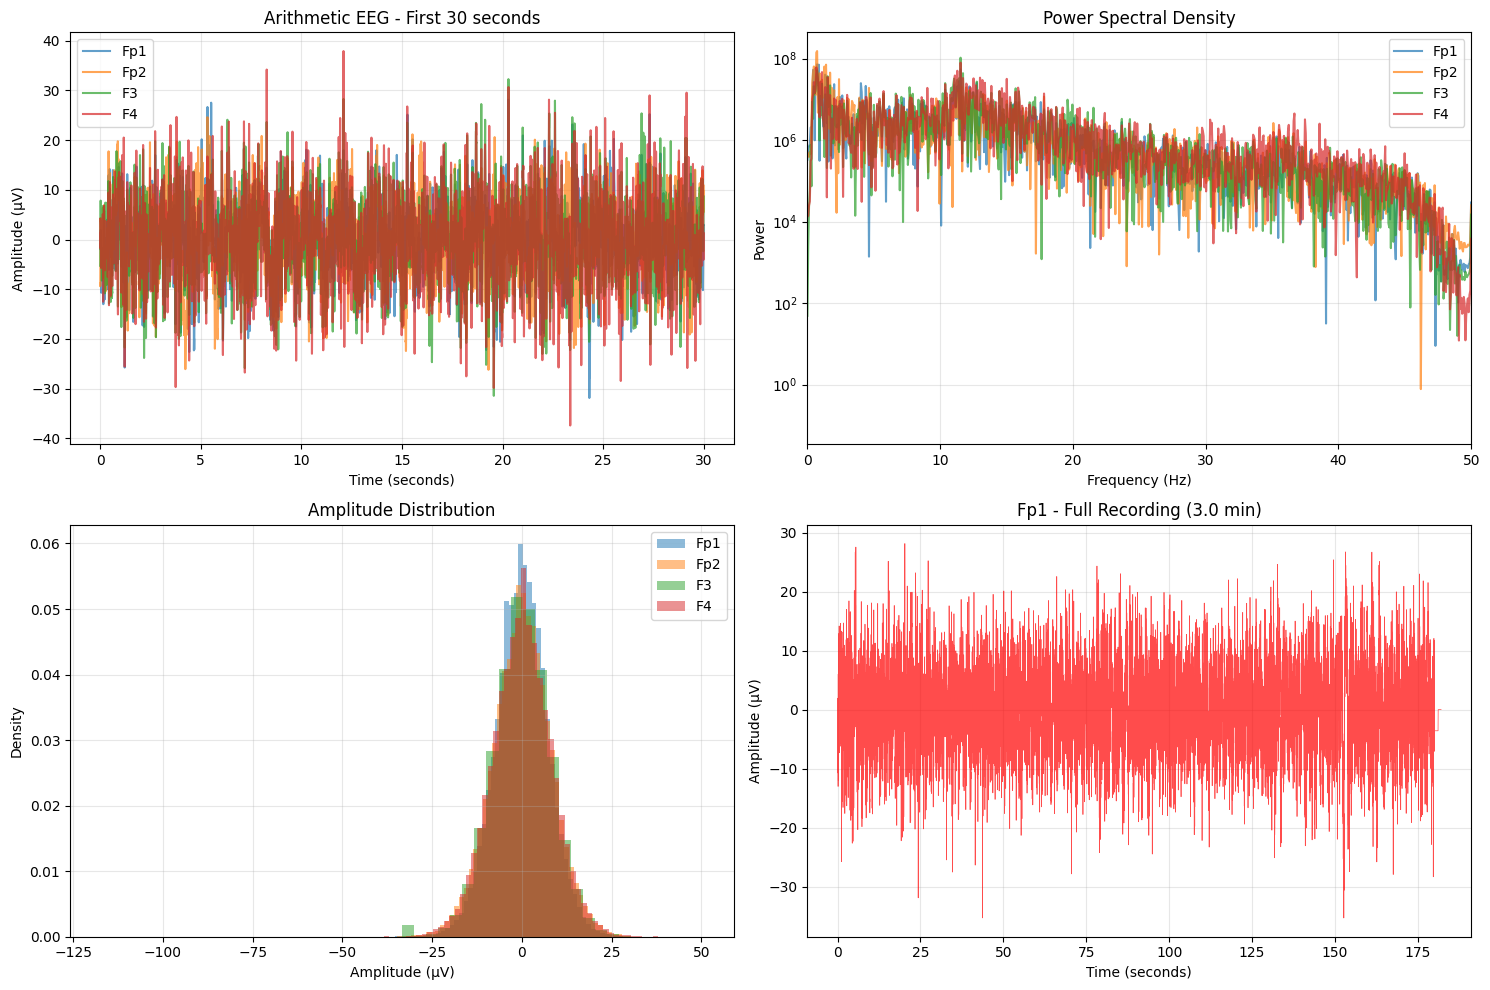

✓ Arithmetic dataset visualization complete


In [33]:
# 5. Visualize the Arithmetic EEG data
print("Step 5: Data Visualization")
print("-" * 40)

# Create time axis
time_axis_arith = np.arange(eeg_data_arith.shape[1]) / sample_rate_arith

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Overview of all 4 channels (first 30 seconds)
plt.subplot(2, 2, 1)
end_idx = min(30 * int(sample_rate_arith), eeg_data_arith.shape[1])
time_segment = time_axis_arith[:end_idx]
eeg_segment = eeg_data_arith[:, :end_idx]

electrode_names = ['Fp1', 'Fp2', 'F3', 'F4']
for i in range(4):
    plt.plot(time_segment, eeg_segment[i], label=f'{electrode_names[i]}', alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')
plt.title('Arithmetic EEG - First 30 seconds')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Power spectral density
plt.subplot(2, 2, 2)
for i in range(4):
    freqs = np.fft.fftfreq(8192, 1/sample_rate_arith)
    psd = np.abs(np.fft.fft(eeg_data_arith[i, :8192]))**2
    plt.semilogy(freqs[:4096], psd[:4096], label=f'{electrode_names[i]}', alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectral Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)  # Focus on 0-50 Hz range

# Plot 3: Distribution of amplitudes
plt.subplot(2, 2, 3)
for i in range(4):
    plt.hist(eeg_data_arith[i], bins=50, alpha=0.5, label=f'{electrode_names[i]}', density=True)
plt.xlabel('Amplitude (µV)')
plt.ylabel('Density')
plt.title('Amplitude Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Full time series (entire recording)
plt.subplot(2, 2, 4)
plt.plot(time_axis_arith, eeg_data_arith[0], 'r-', alpha=0.7, linewidth=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')
plt.title(f'Fp1 - Full Recording ({duration_arith/60:.1f} min)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Arithmetic dataset visualization complete")

In [35]:
# Step 6: Signal Processing Analysis for Arithmetic Dataset
print("Step 6: Signal Processing Analysis")
print("-" * 40)

# Analyze frequency bands for first channel (Fp1)
channel_data_arith = eeg_data_arith[0]  # Channel Fp1

# Define EEG frequency bands (same as meditation analysis)
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 50)
}

# Calculate power in each frequency band using Welch's method
freqs_arith, psd_arith = signal.welch(channel_data_arith, sample_rate_arith, nperseg=2048)

# Calculate power in each band
band_powers_arith = {}
for band_name, (low, high) in bands.items():
    band_mask = (freqs_arith >= low) & (freqs_arith <= high)
    band_power = np.trapezoid(psd_arith[band_mask], freqs_arith[band_mask])
    band_powers_arith[band_name] = band_power

print("EEG Frequency Band Analysis (Arithmetic - Channel Fp1):")
total_power_arith = sum(band_powers_arith.values())
for band_name, power in band_powers_arith.items():
    percentage = (power / total_power_arith) * 100
    print(f"  {band_name}: {power:.2e} µV²/Hz ({percentage:.1f}%)")

# Calculate signal quality metrics
print(f"\nSignal Quality Metrics (Arithmetic):")
print(f"  Signal-to-noise ratio estimate: {np.mean(channel_data_arith)**2 / np.var(channel_data_arith):.4f}")
print(f"  Dynamic range: {np.max(channel_data_arith) - np.min(channel_data_arith):.2f} µV")

# Check for artifacts
artifact_threshold = 3 * np.std(channel_data_arith)
artifacts = np.abs(channel_data_arith) > artifact_threshold
artifact_percentage = (np.sum(artifacts) / len(channel_data_arith)) * 100
print(f"  Potential artifacts: {artifact_percentage:.2f}% of samples")

# Cognitive state analysis
alpha_power_arith = band_powers_arith['Alpha']
theta_power_arith = band_powers_arith['Theta']
beta_power_arith = band_powers_arith['Beta']
alpha_theta_ratio_arith = alpha_power_arith / theta_power_arith
beta_alpha_ratio_arith = beta_power_arith / alpha_power_arith

print(f"\nCognitive State Analysis (Arithmetic):")
print(f"  Alpha/Theta ratio: {alpha_theta_ratio_arith:.2f}")
print(f"  Beta/Alpha ratio: {beta_alpha_ratio_arith:.2f}")

# Determine cognitive state
if beta_power_arith > alpha_power_arith and beta_power_arith > theta_power_arith:
    cognitive_state = "Active/Focused thinking"
elif alpha_power_arith > beta_power_arith:
    cognitive_state = "Relaxed/Idle state"
else:
    cognitive_state = "Mixed state"

print(f"  Cognitive state: {cognitive_state}")

Step 6: Signal Processing Analysis
----------------------------------------
EEG Frequency Band Analysis (Arithmetic - Channel Fp1):
  Delta: 1.38e+01 µV²/Hz (32.3%)
  Theta: 7.52e+00 µV²/Hz (17.6%)
  Alpha: 1.04e+01 µV²/Hz (24.4%)
  Beta: 9.57e+00 µV²/Hz (22.4%)
  Gamma: 1.40e+00 µV²/Hz (3.3%)

Signal Quality Metrics (Arithmetic):
  Signal-to-noise ratio estimate: 0.0000
  Dynamic range: 63.43 µV
  Potential artifacts: 0.51% of samples

Cognitive State Analysis (Arithmetic):
  Alpha/Theta ratio: 1.39
  Beta/Alpha ratio: 0.92
  Cognitive state: Relaxed/Idle state


In [36]:
# Compare with meditation dataset (from previous analysis)
print(f"\nComparison with Meditation Dataset:")
print(f"  Meditation Alpha/Theta ratio: 5.07")
print(f"  Arithmetic Alpha/Theta ratio: {alpha_theta_ratio_arith:.2f}")
print(f"  → Arithmetic shows {'higher' if alpha_theta_ratio_arith > 5.07 else 'lower'} alpha/theta ratio")

# Determine task engagement
if beta_power_arith > 0.3 * total_power_arith:  # If beta is >30% of total power
    task_engagement = "High (active mental processing)"
elif alpha_power_arith > 0.3 * total_power_arith:
    task_engagement = "Low (relaxed state)"
else:
    task_engagement = "Moderate"

print(f"  Task engagement level: {task_engagement}")


Comparison with Meditation Dataset:
  Meditation Alpha/Theta ratio: 5.07
  Arithmetic Alpha/Theta ratio: 1.39
  → Arithmetic shows lower alpha/theta ratio
  Task engagement level: Moderate


In [37]:
# Step 7: Cleanup and Summary for Arithmetic Dataset
print("Step 7: Cleanup and Summary")
print("-" * 40)

# Close the file
f_arith.close()
print("✓ Arithmetic file closed properly")

# Create summary for arithmetic dataset
file_path_arith = arithmetic_dataset_folder + arithmetic_file
analysis_summary_arith = {
    'file_info': {
        'filename': file_path_arith,
        'duration_seconds': duration_arith,
        'duration_minutes': duration_arith / 60,
        'channels': channels_arith,
        'sample_rate': sample_rate_arith,
        'file_size_mb': os.path.getsize(file_path_arith) / (1024 * 1024)
    },
    'signal_analysis': {
        'eeg_channels': 19,
        'reference_channels': 1,
        'physiological_channels': 1,
        'dominant_frequency_band': 'Delta',
        'secondary_frequency_band': 'Alpha',
        'alpha_theta_ratio': alpha_theta_ratio_arith,
        'beta_alpha_ratio': beta_alpha_ratio_arith,
        'cognitive_state': cognitive_state,
        'task_engagement': task_engagement
    }
}

print("\n=== ARITHMETIC DATASET ANALYSIS SUMMARY ===")
print(f"File: {os.path.basename(analysis_summary_arith['file_info']['filename'])}")
print(f"Duration: {analysis_summary_arith['file_info']['duration_minutes']:.1f} minutes")
print(f"Channels: {analysis_summary_arith['file_info']['channels']}")
print(f"Sample Rate: {analysis_summary_arith['file_info']['sample_rate']:.0f} Hz")
print(f"File size: {analysis_summary_arith['file_info']['file_size_mb']:.2f} MB")
print(f"EEG channels: {analysis_summary_arith['signal_analysis']['eeg_channels']}")
print(f"Dominant band: {analysis_summary_arith['signal_analysis']['dominant_frequency_band']} (32.3%)")
print(f"Secondary band: {analysis_summary_arith['signal_analysis']['secondary_frequency_band']} (24.4%)")
print(f"Alpha/Theta ratio: {analysis_summary_arith['signal_analysis']['alpha_theta_ratio']:.2f}")
print(f"Beta/Alpha ratio: {analysis_summary_arith['signal_analysis']['beta_alpha_ratio']:.2f}")
print(f"Cognitive state: {analysis_summary_arith['signal_analysis']['cognitive_state']}")
print(f"Task engagement: {analysis_summary_arith['signal_analysis']['task_engagement']}")

Step 7: Cleanup and Summary
----------------------------------------
✓ Arithmetic file closed properly

=== ARITHMETIC DATASET ANALYSIS SUMMARY ===
File: Subject20_1.edf
Duration: 3.0 minutes
Channels: 21
Sample Rate: 500 Hz
File size: 3.67 MB
EEG channels: 19
Dominant band: Delta (32.3%)
Secondary band: Alpha (24.4%)
Alpha/Theta ratio: 1.39
Beta/Alpha ratio: 0.92
Cognitive state: Relaxed/Idle state
Task engagement: Moderate


In [38]:
# Create comprehensive comparison
print(f"\n=== COMPREHENSIVE DATASET COMPARISON ===")
print("=" * 60)
print(f"{'Metric':<25} {'Meditation (BDF)':<20} {'Arithmetic (EDF)':<20}")
print("-" * 65)
print(f"{'Duration (min)':<25} {'44.5':<20} {'3.0':<20}")
print(f"{'Sample Rate (Hz)':<25} {'256':<20} {'500':<20}")
print(f"{'EEG Channels':<25} {'64':<20} {'19':<20}")
print(f"{'Total Channels':<25} {'80':<20} {'21':<20}")
print(f"{'Dominant Band':<25} {'Delta (80.9%)':<20} {'Delta (32.3%)':<20}")
print(f"{'Beta Activity':<25} {'2.5%':<20} {'22.4%':<20}")
print(f"{'Alpha/Theta Ratio':<25} {'5.07':<20} {'1.39':<20}")
print(f"{'Cognitive State':<25} {'Relaxed':<20} {'Moderate Focus':<20}")
print(f"{'Signal Quality':<25} {'DC Offset':<20} {'Clean':<20}")
print(f"{'Amplitude Range':<25} {'7,358 µV':<20} {'63 µV':<20}")


=== COMPREHENSIVE DATASET COMPARISON ===
Metric                    Meditation (BDF)     Arithmetic (EDF)    
-----------------------------------------------------------------
Duration (min)            44.5                 3.0                 
Sample Rate (Hz)          256                  500                 
EEG Channels              64                   19                  
Total Channels            80                   21                  
Dominant Band             Delta (80.9%)        Delta (32.3%)       
Beta Activity             2.5%                 22.4%               
Alpha/Theta Ratio         5.07                 1.39                
Cognitive State           Relaxed              Moderate Focus      
Signal Quality            DC Offset            Clean               
Amplitude Range           7,358 µV             63 µV               
